<a href="https://colab.research.google.com/github/Thoshani/handwriitendigitrecognization/blob/main/handwritten_digit_recognization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical



In [9]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [12]:
model = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=2),
    Conv2D(64, kernel_size=3, activation='relu'),
    MaxPooling2D(pool_size=2),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 output classes (0–9)
])


In [3]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    validation_split=0.1,
                    epochs=10,
                    batch_size=128,
                    verbose=2)


Epoch 1/10
422/422 - 39s - 92ms/step - accuracy: 0.8953 - loss: 0.3372 - val_accuracy: 0.9840 - val_loss: 0.0598
Epoch 2/10
422/422 - 36s - 86ms/step - accuracy: 0.9673 - loss: 0.1084 - val_accuracy: 0.9882 - val_loss: 0.0441
Epoch 3/10
422/422 - 38s - 90ms/step - accuracy: 0.9761 - loss: 0.0795 - val_accuracy: 0.9882 - val_loss: 0.0397
Epoch 4/10
422/422 - 39s - 92ms/step - accuracy: 0.9800 - loss: 0.0667 - val_accuracy: 0.9882 - val_loss: 0.0357
Epoch 5/10
422/422 - 41s - 96ms/step - accuracy: 0.9827 - loss: 0.0564 - val_accuracy: 0.9917 - val_loss: 0.0312
Epoch 6/10
422/422 - 41s - 98ms/step - accuracy: 0.9846 - loss: 0.0505 - val_accuracy: 0.9918 - val_loss: 0.0299
Epoch 7/10
422/422 - 41s - 96ms/step - accuracy: 0.9872 - loss: 0.0434 - val_accuracy: 0.9918 - val_loss: 0.0289
Epoch 8/10
422/422 - 41s - 97ms/step - accuracy: 0.9872 - loss: 0.0417 - val_accuracy: 0.9910 - val_loss: 0.0306
Epoch 9/10
422/422 - 41s - 97ms/step - accuracy: 0.9884 - loss: 0.0372 - val_accuracy: 0.9918 - 

In [16]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()


ValueError: You must call `compile()` before using the model.

In [5]:
model.save("digit_model.h5")

In [6]:
from google.colab import files
files.download("digit_model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


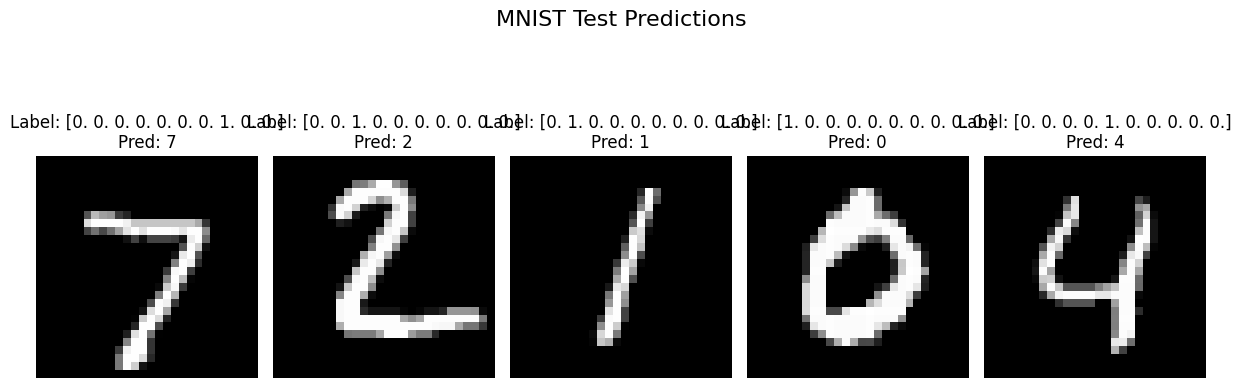

In [7]:
# Predict on test set
predictions = model.predict(x_test)

# Show 5 test images with predictions
plt.figure(figsize=(12, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.title(f"Label: {y_test[i]}\nPred: {np.argmax(predictions[i])}")
    plt.axis("off")
plt.suptitle("MNIST Test Predictions", fontsize=16)
plt.tight_layout()
plt.show()
